In [167]:
import os
import glob
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [168]:
# helpers

def printLoadingScores(pca, index, component):
    # prints loading scores for a given principal component 
    loadingScores = pd.Series(pca.components_[component], index=index).sort_values(ascending=False, key=abs)
    print(loadingScores[loadingScores[0:19].index.values])
    

In [169]:
# Read and merge all cleaned data csv's into a single data frame

csvFiles = glob.glob(os.path.join('./Data/Cleaned', '*.csv'))
df = pd.DataFrame()

for file in csvFiles: 
    if df.empty: df = pd.read_csv(file)
    else: df.merge(pd.read_csv(file))

df

,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,448,Nicolo Melli,DAL,30,45,26,19,12.6,3.0,1.0,3.1,32.6,0.5,1.9,27.1,0.4,0.6,76.0,0.6,2.1,2.7,1.0,0.3,0.3,0.1,1.3,8.6,0,0,0.5
393,456,Matthew Dellavedova,CLE,30,13,4,9,17.2,2.8,1.1,4.3,25.0,0.3,1.9,16.0,0.3,0.3,100.0,0.5,1.4,1.8,4.5,0.5,0.3,0.1,1.6,12.4,0,0,-1.4
394,467,KZ Okpala,MIA,22,37,22,15,12.1,2.5,1.0,2.6,37.5,0.3,1.4,24.0,0.2,0.4,53.3,0.6,1.3,1.8,0.5,0.4,0.3,0.3,1.6,6.8,0,0,-1.8
395,474,Wes Iwundu,NOP,26,41,17,24,13.1,2.4,0.8,2.5,33.3,0.1,1.0,12.2,0.6,0.8,83.9,0.4,1.8,2.2,0.4,0.5,0.4,0.1,1.2,6.6,0,0,-2.3


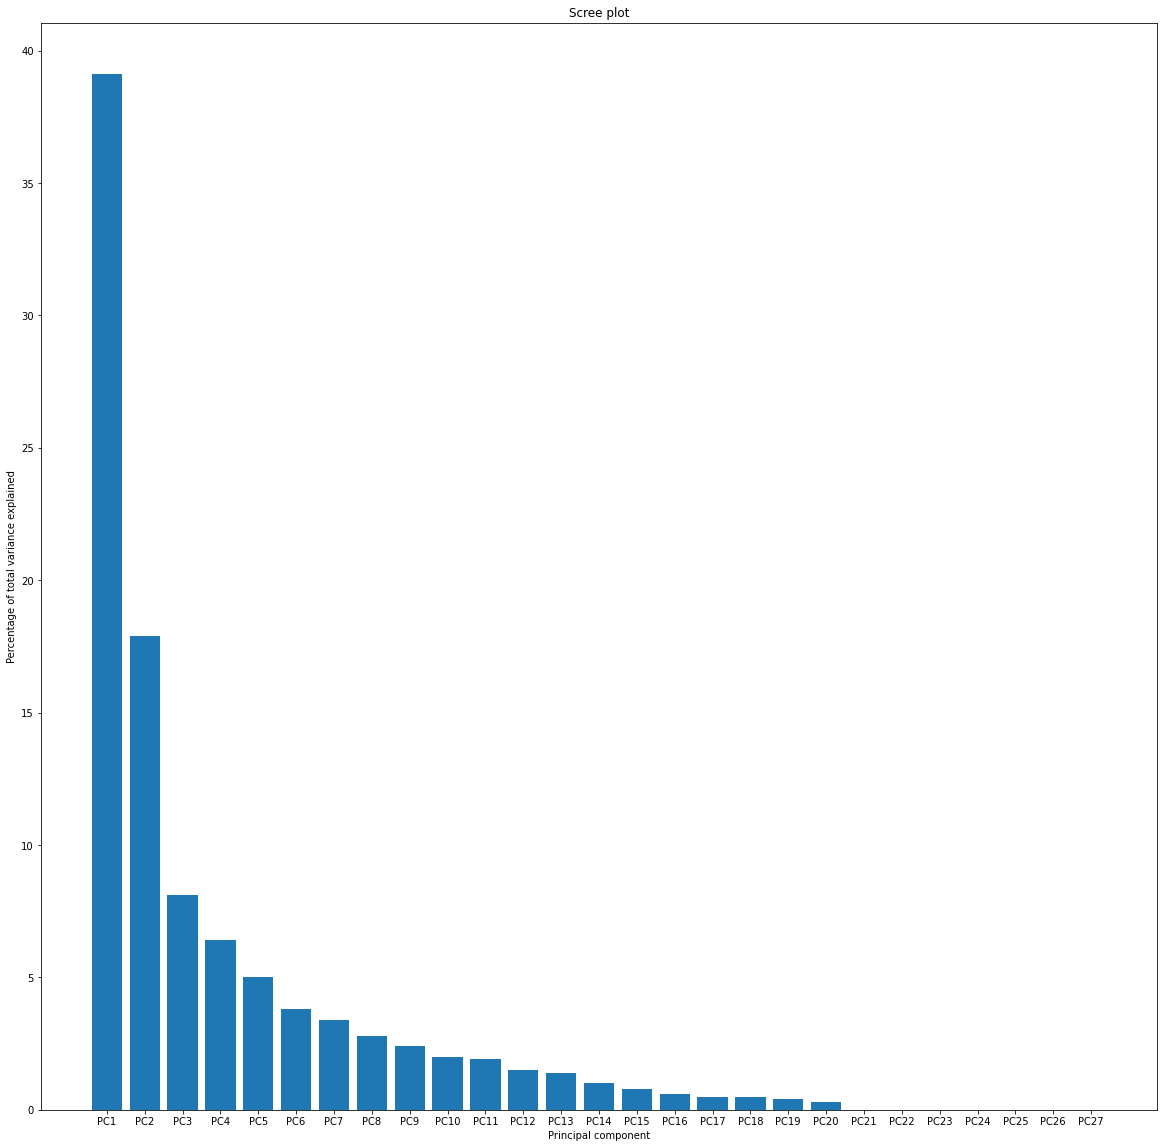

In [170]:
# drop non-numeric and unwanted coloumns
tempDf = df.drop(["Unnamed: 0", "PLAYER", "TEAM"], axis=1)

# shift data mean to origin and scale variance in each feature to 1
scaledDf = preprocessing.scale(tempDf)

# perform pca
pca = PCA()
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

# find percentage of variance accounted for by principal componenets
varPercent = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# create scree plot
labels = ['PC' + str(i) for i in range(1, len(varPercent) + 1)]

plt.figure(figsize = (20,20))
plt.bar(x=labels, height=varPercent)
plt.ylabel('Percentage of total variance explained')
plt.xlabel('Principal component')
plt.title("Scree plot")
plt.show()


In [171]:
# re-run pca keeping only top 5 components
pca = PCA(5)
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

In [172]:
# re-insert players and teams to make a new data frame

pcaDf = pd.DataFrame(pcaData, columns=labels[0:5])
pcaDf = pcaDf[labels[0:5]]
pcaDf["PLAYER"] = df["PLAYER"]
pcaDf["TEAM"] = df["TEAM"]

pcaDf

,PC1,PC2,PC3,PC4,PC5,PLAYER,TEAM
0,8.618592,-4.764231,-0.184351,-0.876290,-1.455565,Stephen Curry,GSW
1,7.547162,-2.007608,1.315104,0.039328,-1.306496,Bradley Beal,WAS
2,7.849199,-4.113988,0.092056,-0.515310,-0.447325,Damian Lillard,POR
3,9.307391,2.632802,0.435836,-3.010831,-1.358745,Joel Embiid,PHI
4,10.372789,3.416813,0.444730,-1.626843,1.623089,Giannis Antetokounmpo,MIL
...,...,...,...,...,...,...,...
392,-4.352650,-0.497822,-0.483803,-1.048281,1.033482,Nicolo Melli,DAL
393,-4.195324,-1.496190,2.228372,-2.467745,1.293796,Matthew Dellavedova,CLE
394,-5.072941,0.670500,0.913170,-0.303284,0.511547,KZ Okpala,MIA
395,-4.855230,-0.100525,0.769869,-0.163135,1.122696,Wes Iwundu,NOP


In [173]:
# PC1

printLoadingScores(pca, tempDf.columns, 0)
pcaDf.nlargest(10, "PC1")

FP      0.303468
PTS     0.289561
FGM     0.289306
FGA     0.279708
MIN     0.273472
TOV     0.264391
FTA     0.261784
FTM     0.261340
DREB    0.226751
AST     0.226451
DD2     0.211739
REB     0.200672
STL     0.188345
PF      0.160939
3PA     0.156962
3PM     0.155954
TD3     0.126166
+/-     0.115608
W       0.109573
dtype: float64


,PC1,PC2,PC3,PC4,PC5,PLAYER,TEAM
29,12.164247,3.155413,2.477113,-0.020914,13.041288,Russell Westbrook,WAS
12,10.673181,3.157001,-0.705993,-0.988550,5.349503,Nikola Jokic,DEN
4,10.372789,3.416813,0.444730,-1.626843,1.623089,Giannis Antetokounmpo,MIL
20,9.705799,-0.743082,1.949917,-2.500788,3.912396,James Harden,BKN
5,9.703477,-0.690457,1.287108,0.081036,3.003630,Luka Doncic,DAL
3,9.307391,2.632802,0.435836,-3.010831,-1.358745,Joel Embiid,PHI
22,8.939652,0.775977,-0.046026,0.453512,1.910126,Julius Randle,NYK
0,8.618592,-4.764231,-0.184351,-0.876290,-1.455565,Stephen Curry,GSW
40,8.330613,3.982020,1.115915,0.813865,3.456265,Domantas Sabonis,IND
18,8.162322,2.011523,1.510838,0.300653,-1.628579,Karl-Anthony Towns,MIN


In [174]:
# PC2

printLoadingScores(pca, tempDf.columns, 1)
pcaDf.nlargest(10, "PC2")

OREB    0.394549
3PA    -0.331034
3PM    -0.325634
FG%     0.312838
BLK     0.302809
3P%    -0.301206
REB     0.300887
FT%    -0.273985
DREB    0.223800
DD2     0.209768
PF      0.165087
FGA    -0.128221
AST    -0.124040
PTS    -0.085532
MIN    -0.073057
STL    -0.061449
TD3     0.058002
AGE    -0.052159
FGM    -0.045361
dtype: float64


,PC1,PC2,PC3,PC4,PC5,PLAYER,TEAM
82,4.846534,8.985984,-1.243795,-0.444679,-0.638276,Clint Capela,ATL
94,5.640568,8.927406,-3.132372,-2.306245,-0.995444,Rudy Gobert,UTA
227,-0.251843,6.488575,1.130856,-0.705116,-1.695830,Mitchell Robinson,NYK
220,0.713681,6.382636,-1.297628,1.224269,-0.649466,Jakob Poeltl,SAS
86,4.398879,6.379446,1.707149,0.268256,-0.071625,Andre Drummond,LAL
253,0.331518,5.975747,-0.350282,0.604879,0.576090,Steven Adams,NOP
219,-0.462350,5.911037,2.404857,1.866585,-0.802184,Moses Brown,BOS
65,4.954150,5.770862,-1.367699,-0.309329,-0.253878,Jonas Valanciunas,MEM
235,-0.603543,5.768128,-0.502080,-0.299224,-1.075043,Robert Williams III,BOS
258,-0.703441,5.688269,-1.272840,-1.008850,-0.230548,DeAndre Jordan,BKN


In [175]:
# PC3

printLoadingScores(pca, tempDf.columns, 2)
pcaDf.nlargest(10, "PC3")

W      -0.575329
GP     -0.500339
+/-    -0.424147
AGE    -0.250531
TOV     0.164100
FTA     0.162888
FG%    -0.147535
FTM     0.144360
3P%    -0.127510
FT%    -0.116913
FGA     0.099234
AST     0.097849
L      -0.097379
TD3     0.066558
PTS     0.066399
FGM     0.057739
3PM    -0.051066
FP      0.044133
OREB   -0.041696
dtype: float64


,PC1,PC2,PC3,PC4,PC5,PLAYER,TEAM
68,2.398825,-1.440885,4.587103,0.865225,-0.191926,Kevin Porter Jr.,HOU
92,1.477148,1.159386,3.860117,-1.013344,-2.972732,Jaren Jackson Jr.,MEM
384,-4.173272,0.716175,3.748785,0.242869,0.729684,Josh Hall,OKC
24,4.817642,-1.330837,3.493529,-0.195858,-1.021710,Shai Gilgeous-Alexander,OKC
226,-2.483932,0.707253,3.377499,-1.951043,0.340781,Gabriel Deck,OKC
385,-5.791740,1.104732,3.365891,-0.535121,0.591757,Jordan Bone,ORL
286,-1.048107,-1.162610,3.341624,0.543870,0.960482,Killian Hayes,DET
372,-4.158003,-0.999015,3.244668,-1.504646,-0.012806,Charlie Brown Jr.,OKC
37,4.244728,-2.207410,3.145360,-0.005102,0.607731,John Wall,HOU
310,-3.405502,1.873067,3.129229,-0.841291,0.396904,Jaylen Hoard,OKC


In [176]:
# PC4

printLoadingScores(pca, tempDf.columns, 3)
pcaDf.nlargest(10, "PC4")

L       0.689731
GP      0.401822
+/-    -0.399017
AGE    -0.370050
PF      0.115540
FT%    -0.111547
MIN     0.093557
FG%    -0.090906
FTM    -0.071401
STL     0.056865
FTA    -0.053103
3PA     0.047178
AST    -0.043604
TD3    -0.039015
DREB   -0.036964
BLK    -0.035010
FP     -0.029902
FGA     0.028408
TOV     0.026956
dtype: float64


,PC1,PC2,PC3,PC4,PC5,PLAYER,TEAM
176,-0.107584,-1.493702,1.689599,3.899401,0.595766,Theo Maledon,OKC
187,-0.299592,0.070171,0.791509,3.825682,-0.228042,Isaac Okoro,CLE
48,3.393335,-1.661256,0.923197,3.537585,-0.875959,Anthony Edwards,MIN
150,1.091744,1.501565,-0.132846,3.426453,-0.275838,Jae'Sean Tate,HOU
161,-1.091488,-0.962201,0.240967,3.310296,0.390149,Dwayne Bacon,ORL
133,0.307140,-1.797153,-0.080120,3.251054,-0.551310,Saddiq Bey,DET
223,-1.877278,-1.574058,0.235277,3.199863,0.578302,Svi Mykhailiuk,OKC
153,-0.402988,1.654788,-0.077043,3.160839,-1.080604,Naz Reid,MIN
285,-1.734821,1.001296,-0.171321,2.966278,-0.840148,Jaden McDaniels,MIN
199,-0.388872,0.604863,-0.308516,2.915378,0.001365,Patrick Williams,CHI


In [177]:
# PC5

printLoadingScores(pca, tempDf.columns, 4)
pcaDf.nlargest(10, "PC5")

TD3     0.621081
AST     0.371222
BLK    -0.314961
DD2     0.263781
3PM    -0.220022
3PA    -0.196779
PF     -0.188021
TOV     0.170529
FG%    -0.141129
AGE     0.137179
PTS    -0.133844
STL     0.131879
FGM    -0.129251
FGA    -0.113192
MIN    -0.111736
OREB   -0.105373
GP      0.102499
W       0.077601
L       0.072482
dtype: float64


,PC1,PC2,PC3,PC4,PC5,PLAYER,TEAM
29,12.164247,3.155413,2.477113,-0.020914,13.041288,Russell Westbrook,WAS
12,10.673181,3.157001,-0.705993,-0.988550,5.349503,Nikola Jokic,DEN
20,9.705799,-0.743082,1.949917,-2.500788,3.912396,James Harden,BKN
272,3.416501,1.479096,-1.099614,-0.291998,3.905896,Draymond Green,GSW
40,8.330613,3.982020,1.115915,0.813865,3.456265,Domantas Sabonis,IND
5,9.703477,-0.690457,1.287108,0.081036,3.003630,Luka Doncic,DAL
218,0.661934,0.457001,-1.285801,0.955361,2.613533,T.J. McConnell,IND
32,6.637671,0.608824,0.766861,-2.041732,2.481434,Jimmy Butler,MIA
70,4.595095,-1.357313,-2.322388,-1.466144,2.268511,Chris Paul,PHX
95,4.645003,2.615976,-0.389232,-1.077742,2.200221,Ben Simmons,PHI


In [178]:
""" Can consider using this cell if we get nice clusters based on just a few variables.

# Principal component plot

pcaDf = pd.DataFrame(pcaData, columns=labels)

# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)
# plt.show()

# Fixing random state for reproducibility

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

xs = pcaDf.PC1
ys = pcaDf.PC2
zs = pcaDf.PC3
ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
"""

" Can consider using this cell if we get nice clusters based on just a few variables.\n\n# Principal component plot\n\npcaDf = pd.DataFrame(pcaData, columns=labels)\n\n# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)\n# plt.show()\n\n# Fixing random state for reproducibility\n\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\n\nn = 100\n\n# For each set of style and range settings, plot n random points in the box\n# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].\n\nxs = pcaDf.PC1\nys = pcaDf.PC2\nzs = pcaDf.PC3\nax.scatter(xs, ys, zs, marker='o')\n\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\n\nplt.show()\n"